# 1. 基本情况

## 题目：新冠疫情大数据分析

## 日期：2021.7.1







# 2. 选题的目的与意义

<font size=4> 对于2020年来说，这个数字是非常美好的。可是，肺炎疫情的到来给我们的祖国蒙上了一层乌云，笼罩着中华大地，突然间，天空黯淡,世界阴冷。新冠肺炎疫情已成为
史上最严重的突发公共卫生事件，值得关注的是,疫情地图的绘制与传播,在新冠肺炎疫情的动态跟踪,信息研判,公众决策,公众连结等方面都扮演了不可替代的角色，疫
情数据的爬取并制作国内外疫情分布地图使普通民众能够相参照，希望让每一位用户更直观地了解自己及亲友周边的疫情动态，便于更有针对性的采取防护措施；也希望
能够协助各地科学决策，做好自身防控的同时，与周边地区加强沟通合作，相互配合与支援，协同应对疫情。
而疫情具体数据的爬取则是疫情地图能够准确创建的重中之重，我们要做的内容必须保证其数据的准确性和实时性，以至于可以真实的想人们反映自己所处的社会现状，
能够调动人们抗疫的积极性和对自己行动的约束，以及给政府相关人员对于疫情地区的管理提供了极大的方便。
在此致敬“为往圣继绝学，为万世开太平”的逆行者，您们永远是最可敬的人，永远是我们的榜样!

# 3. 实现目标



<font size=4> 通过爬虫工具对网易新闻全球疫情部分的API进行爬取，实现获取世界各个地区大国的新型冠状病毒疫情处理详细数据，更加精准迅速的获得疫情人数变化，并且实现自动化的实时更新疫情数据，防止因时间延迟而产生的误判错判，然后通过可视化工具pyecharts等进行可视化，将疫情数据转换绘制成更易于获取信息的折线图、柱状图、饼图等等，以图像的方式分析疫情走向，查看疫情的分布情况以及各地区病毒爆发的严重性，判断疫情的未来发展趋势进行数据分析使用模型预测进行分析实现提前预警，利用Map类绘制世界地图以易懂的方式展示疫情数据。这能够方便疫情防控人员更好的控制人口流动遏制疫情，通过地图能分析预测疫情的病源地更有助于组织疫情传播，对于防止疫情更大规模的爆发有积极的作用。

名字 | 版本
:-:|:-:|
pandas| (0.20.1)
matplotlib|(2.0.2)
requests |(2.14.2)
numpy |(1.12.1)
scipy |(0.19.0)

# 4. 数据来源



>本次数据来源均为团队使用python爬取，考虑到难度和反爬虫机制，经过查阅一些博客信息后，最后选择爬取目标为网易新闻客户端，并且我们成功的查到了网易新闻的全球疫情部分的api，极大的方便了我们下一步的爬取数据集工作。

### 具体的数据爬取过程如下：

**导入基本库**

In [1]:
import requests 
import pandas as pd
import time
pd.set_option('max_rows',500) # 设置显示最大行数
pd.set_option('max_columns',100) # 设置显示最大列数

设置请求头，因为已知具体api故不需要cookie来访问。

In [2]:
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36'
}

设置url地址，并使用request库发起请求

In [67]:
url = 'https://c.m.163.com/ug/api/wuhan/app/data/list-total'   
r = requests.get(url, headers=headers)  # 发起请求
print(r.status_code)  # 查看请求状态
print(type(r.text))    
print(len(r.text))    

200
<class 'str'>
300410


分析发现，返回后的内容是一个几十万长度的字符串，由字符组成的json格式数据，故接下来我们处理这种数据。

In [68]:
import json
data_json = json.loads(r.text)
data_json.keys() # 转换为json格式

dict_keys(['reqId', 'code', 'msg', 'data', 'timestamp'])

In [69]:
data = data_json['data'] # 取出json中的数据
data.keys()  

dict_keys(['chinaTotal', 'chinaDayList', 'lastUpdateTime', 'overseaLastUpdateTime', 'areaTree'])

分析上述输出可以看出，数值中含四个数据分别为：  
> chinaTotal 中国当日数据  
> chinaDayList 中国历史数据  
> lastUpdateTime 最后更新时间  
> overseaLastUpdateTime 世界各地实时数据  

In [71]:
print(data)

{'chinaTotal': {'today': {'confirm': 119, 'suspect': None, 'heal': 231, 'dead': 18, 'severe': None, 'storeConfirm': -126, 'input': 12}, 'total': {'confirm': 118626, 'suspect': 0, 'heal': 108685, 'dead': 5508, 'severe': 0, 'input': 6600}, 'extData': {'noSymptom': 474, 'incrNoSymptom': 19}}, 'chinaDayList': [{'date': '2021-05-02', 'today': {'confirm': 18, 'suspect': 0, 'heal': 0, 'dead': 0, 'severe': None, 'storeConfirm': 0, 'input': 11}, 'total': {'confirm': 103667, 'suspect': 0, 'heal': 98287, 'dead': 4858, 'severe': None, 'input': 5699, 'storeConfirm': 522}, 'extData': None, 'lastUpdateTime': None}, {'date': '2021-05-03', 'today': {'confirm': 27, 'suspect': 0, 'heal': 0, 'dead': 0, 'severe': None, 'storeConfirm': 0, 'input': 17}, 'total': {'confirm': 103694, 'suspect': 0, 'heal': 98307, 'dead': 4858, 'severe': None, 'input': 5716, 'storeConfirm': 529}, 'extData': None, 'lastUpdateTime': None}, {'date': '2021-05-04', 'today': {'confirm': 19, 'suspect': 6, 'heal': 0, 'dead': 0, 'severe'

**接下来我们将提取方法封装为函数，方便后续对每个国家的数据进行提取，观察上方数据格式，我们可以将today今天与至今total分离开来，并在csv文件中以列名的形式进行标注。**

In [72]:
def get_data(data,info_list): # 封装
    info = pd.DataFrame(data)[info_list] 
    
    today_data = pd.DataFrame([i['today'] for i in data ]) # 生成today的数据
    today_data.columns = ['today_'+i for i in today_data.columns] # 标注哪些列为今天数据
    
    total_data = pd.DataFrame([i['total'] for i in data ]) # 生成total的数据
    total_data.columns = ['total_'+i for i in total_data.columns] # 修改列名
    
    return pd.concat([info,total_data,today_data],axis=1) # info、today和total横向合并汇总

In [73]:
areaTree = data['areaTree'] # 取出areaTree
areaTree[0] # 查看爬取的第一个国家突尼斯当日的数据

{'today': {'confirm': 5921,
  'suspect': None,
  'heal': 2261,
  'dead': 116,
  'severe': None,
  'storeConfirm': None},
 'total': {'confirm': 420103,
  'suspect': 0,
  'heal': 354441,
  'dead': 14959,
  'severe': 0,
  'input': 0},
 'extData': {},
 'name': '突尼斯',
 'id': '9577772',
 'lastUpdateTime': '2021-07-01 09:00:15',
 'children': []}

**确定爬取到各个国家的数据时间是否为最新一次数据**

In [74]:
for i in range(len(areaTree)):  # 遍历areaTree
    print(areaTree[i]['name'],areaTree[i]['lastUpdateTime'])
    if i == 30:
        break

突尼斯 2021-07-01 09:00:15
塞尔维亚 2021-07-01 09:00:15
中国 2021-07-01 17:40:26
日本本土 2021-07-01 18:10:31
泰国 2021-07-01 16:35:18
新加坡 2021-07-01 09:00:15
韩国 2021-07-01 11:55:14
澳大利亚 2021-07-01 15:05:20
德国 2021-07-01 18:10:31
美国 2021-07-01 11:30:18
马来西亚 2021-07-01 09:00:15
越南 2021-07-01 11:55:14
圣巴泰勒米 2020-06-12 17:03:12
肯尼亚 2021-07-01 10:20:13
伊朗 2021-07-01 09:00:15
以色列 2021-07-01 16:35:18
毛利亚尼亚 2020-06-09 19:59:04
黎巴嫩 2021-07-01 09:00:15
克罗地亚 2021-07-01 09:00:15
奥地利 2021-07-01 09:00:15
瑞士 2021-07-01 09:00:15
希腊 2021-07-01 09:00:15
毛里求斯 2021-07-01 18:10:31
爱沙尼亚 2021-07-01 18:10:31
北马其顿 2021-07-01 09:00:15
白俄罗斯 2021-07-01 09:00:15
立陶宛 2021-07-01 16:35:18
阿塞拜疆 2021-07-01 09:00:15
美属维尔京群岛 2020-06-12 17:06:26
蒙古 2020-06-15 13:26:49
乌克兰 2021-07-01 18:10:31


**发现以上数据有个别国家未进行更新，但数量较少，并且不是疫情大国，故忽略其对整体样本分析的影响**

**目前我们还需要除中国外其他国家的历史数据用以分析疫情，在上一个url中只给出了各国的今天的实时疫情及中国部分历史疫情数据。  
经过一些博客资料查询，我们可以拿出每个国家的id，而后采用url后缀加上地区码实现查询各个国家的历史疫情信息  
最后保存数据即可**

>先将第一个url中获取到的字符串中每个国家的代码及国家名称进行匹配,并在下方展示5个具体的键值对

In [77]:
today_world = get_data(areaTree,['id','lastUpdateTime','name']).head()
today_world.head()
today_world[['id','name']].head()
country_dict = {key:value for key,value in zip(today_world['id'], today_world['name'])}

count = 0
for i in country_dict:
    print(i,country_dict[i])
    count += 1
    if count == 5:
        break

9577772 突尼斯
9507896 塞尔维亚
0 中国
1 日本本土
2 泰国


**之后我们有了具体的每个国家的编号在country_dict中，便可以通过url爬取各个国家的历史数据**

In [78]:
start = time.time()
for country_id in country_dict: # 遍历每个国家的编号
    
    try:
        # 按照编号访问每个国家的数据地址，并获取json数据
        url = 'https://c.m.163.com/ug/api/wuhan/app/data/list-by-area-code?areaCode='+country_id
        r = requests.get(url, headers=headers)
        json_data = json.loads(r.text)
        
        # 生成每个国家的数据
        country_data = get_data(json_data['data']['list'],['date'])
        country_data['name'] = country_dict[country_id]

        # 数据叠加
        if country_id == '9577772':
            alltime_world = country_data
        else:
            alltime_world = pd.concat([alltime_world,country_data])
            
        print('-'*20,country_dict[country_id],'成功','-'*20)
        
        time.sleep(10)

    except:
        print('-'*20,country_dict[country_id],'wrong','-'*20)

-------------------- 突尼斯 成功 --------------------
-------------------- 塞尔维亚 成功 --------------------
-------------------- 中国 成功 --------------------
-------------------- 日本本土 成功 --------------------
-------------------- 泰国 成功 --------------------


**设置保存函数**

In [ ]:
def save_data(data,name): # 定义保存数据方法
    file_name = name+'_'+time.strftime('%Y_%m_%d',time.localtime(time.time()))+'.csv'
    data.to_csv(file_name,index=None,encoding='utf_8_sig')
    print(file_name+' 保存成功！')
time.strftime('%Y_%m_%d',time.localtime(time.time()))

In [ ]:
save_data(alltime_world,'alltime_world')

# 5. 数据分析过程

>注：写清楚数据分析、处理、转换、可视化的流程、步骤、关键语句、可视化结果及结论。

## 5.1数据预处理

### 5.1.1读取爬取的疫情数据

In [3]:
#读取爬取的疫情数据（alltime_world_2021_07_01.csv）
import pandas as pd
alltime_world = pd.read_csv('alltime_world_2021_07_01.csv', encoding='utf-8')   # 1）读取文件
alltime_world.info()     # 2）查看所有列名的基本信息
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊', 'today_input':'当日输入',
             'total_confirm':'累计确诊','total_suspect':'累计疑似','total_heal':'累计治愈',
             'total_dead':'累计死亡','total_severe':'累计重症','total_input':'累计输入'}   # 3）创建对应英文的映射
alltime_world.rename(columns=name_dict, inplace=True)   # 4)将英文列名更改中文列名
alltime_world.info()  # 5) 查看更改完毕的列名信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73597 entries, 0 to 73596
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                73597 non-null  object 
 1   total_confirm       73597 non-null  int64  
 2   total_suspect       73597 non-null  int64  
 3   total_heal          73597 non-null  int64  
 4   total_dead          73597 non-null  int64  
 5   total_severe        73597 non-null  int64  
 6   total_input         73597 non-null  int64  
 7   today_confirm       73597 non-null  int64  
 8   today_suspect       12909 non-null  float64
 9   today_heal          73597 non-null  int64  
 10  today_dead          73597 non-null  int64  
 11  today_severe        12509 non-null  float64
 12  today_storeConfirm  0 non-null      float64
 13  today_input         73401 non-null  float64
 14  name                73597 non-null  object 
dtypes: float64(4), int64(9), object(2)
memory usage: 8.4+

### 5.1.2查看数据

In [4]:
## 打开文件后，对数据的整体有个大概的了解
# 查看数据表的信息
print('\n\n查看二维数据表的统计消息，统计数值型数据: \n', alltime_world.describe())#查看数据的波动范围，对后面的模型有启示性作用
print('\n\n查看二维数据表的列标签：\n', alltime_world.columns )
print('\n\n查看二维数据表的行标签：\n', alltime_world.index )
print('\n\n查看二维数据表的值：\n', alltime_world.values )
print('\n\n查看二维数据表的前5行：\n', alltime_world.head() )#查看前五行数据
print('\n\n查看二维数据表的后5行：\n', alltime_world.tail() )#查看后五行数据



查看二维数据表的统计消息，统计数值型数据: 
                累计确诊          累计疑似          累计治愈           累计死亡          累计重症  \
count  7.359700e+04  73597.000000  7.359700e+04   73597.000000  73597.000000   
mean   4.320789e+05      3.721402  3.245508e+05   10082.629835      1.503336   
std    2.062013e+06    255.715003  1.649815e+06   40681.171536     82.399681   
min    0.000000e+00      0.000000  0.000000e+00       0.000000      0.000000   
25%    3.067000e+03      0.000000  1.481000e+03      58.000000      0.000000   
50%    2.700000e+04      0.000000  1.495200e+04     436.000000      0.000000   
75%    1.822500e+05      0.000000  1.199730e+05    3597.000000      0.000000   
max    3.454084e+07  28942.000000  2.948892e+07  620249.000000   7365.000000   

               累计输入         当日新增确诊        当日新增疑似        当日新增治愈         当日新增死亡  \
count  73597.000000   73597.000000  12909.000000  7.359700e+04   73597.000000   
mean      22.565743    2478.105602      3.528314  2.057816e+03      53.676644   
std      3

### 5.1.3缺失值处理

In [5]:
# 计算缺失值占比
alltime_world_nan = alltime_world.isnull().sum()/len(alltime_world)

# 转变为百分数
alltime_world_nan.apply(lambda x: format(x, '.1%'))

日期          0.0%
累计确诊        0.0%
累计疑似        0.0%
累计治愈        0.0%
累计死亡        0.0%
累计重症        0.0%
累计输入        0.0%
当日新增确诊      0.0%
当日新增疑似     82.5%
当日新增治愈      0.0%
当日新增死亡      0.0%
当日新增重症     83.0%
当日现存确诊    100.0%
当日输入        0.3%
名称          0.0%
dtype: object

### 缺失值原因：我们发现当日新增相关数据缺失值较多，这主要由于采集数据的当天一些国家没有更新数据，因此我们将不再对其进行分析。当日现存确诊一列虽然全部为空，但该缺失值可以通过已有数据直接计算

> **<span style="border-bottom:2px dashed blue;"> 公式为：当日现存确诊=累计确诊-累计治愈-累计死亡</span>**

In [6]:
# 对缺失值进行处理

# 先使用线性插值的方式填充缺失值
alltime_world.interpolate(method='linear', inplace=True)

# 再使用0填充缺失值
alltime_world.fillna(0, inplace=True)

# 根据上述公式（当日现存确诊=累计确诊-累计治愈-累计死亡）计算当日现存确诊人数
alltime_world['当日现存确诊'] = alltime_world['累计确诊']-alltime_world['累计治愈']-alltime_world['累计死亡']

# 将日期改成datetime格式
alltime_world['日期'] = pd.to_datetime(alltime_world['日期'])
Temp=alltime_world
alltime_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73597 entries, 0 to 73596
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      73597 non-null  datetime64[ns]
 1   累计确诊    73597 non-null  int64         
 2   累计疑似    73597 non-null  int64         
 3   累计治愈    73597 non-null  int64         
 4   累计死亡    73597 non-null  int64         
 5   累计重症    73597 non-null  int64         
 6   累计输入    73597 non-null  int64         
 7   当日新增确诊  73597 non-null  int64         
 8   当日新增疑似  73597 non-null  float64       
 9   当日新增治愈  73597 non-null  int64         
 10  当日新增死亡  73597 non-null  int64         
 11  当日新增重症  73597 non-null  float64       
 12  当日现存确诊  73597 non-null  int64         
 13  当日输入    73597 non-null  float64       
 14  名称      73597 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(10), object(1)
memory usage: 8.4+ MB


In [7]:
alltime_world

,日期,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计输入,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日输入,名称
0,2020-03-03,1,0,0,0,0,0,1,0.0,0,0,0.0,1,0.0,突尼斯
1,2020-03-08,2,0,0,0,0,0,1,0.0,0,0,0.0,2,0.0,突尼斯
2,2020-03-09,5,0,0,0,0,0,3,0.0,0,0,0.0,5,0.0,突尼斯
3,2020-03-11,7,0,0,0,0,0,2,0.0,0,0,0.0,7,0.0,突尼斯
4,2020-03-12,13,0,0,0,0,0,6,0.0,0,0,0.0,13,0.0,突尼斯
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73592,2021-06-26,42194,0,40569,906,0,0,0,0.0,0,0,0.0,719,0.0,马达加斯加
73593,2021-06-27,42194,0,40569,906,0,0,0,0.0,0,0,0.0,719,0.0,马达加斯加
73594,2021-06-28,42194,0,40579,909,0,0,0,0.0,10,3,0.0,706,0.0,马达加斯加
73595,2021-06-29,42194,0,40579,909,0,0,0,0.0,0,0,0.0,706,0.0,马达加斯加


## 5.2数据分析可视化1-matplotlib绘图

### 5.2.1绘制多个国家的累计确诊人数折线图

#### 目的：查看“累计确诊”人数最多的8个国家数据，并可视化累计确诊人数最多的八个国家（'美国','巴西','俄罗斯','西班牙','意大利','英国','法国','德国'）

#### 步骤：
#### step1:创建画布，切分绘图区域
#### step2:定义自定义函数,设置绘图区字体
#### step3:取出累计确诊人数最多的八个国家
#### step4:遍历八个国家，调用自定义函数绘图

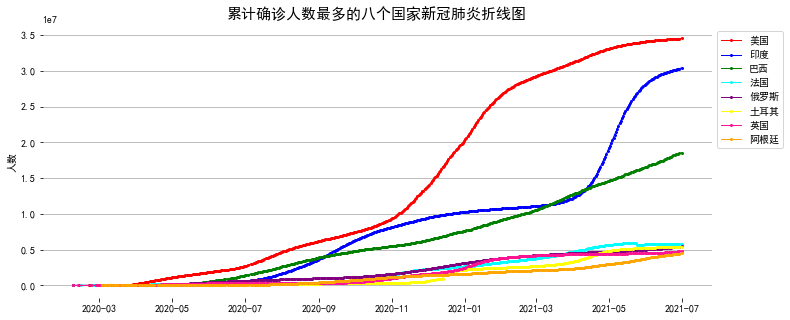

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 自定义函数，接收国家和颜色两个参数，每次调用绘制一个国家的折线图
def line_chart(name,color1):
    x = alltime_world.loc[alltime_world.名称==name,'日期']
    y_total = alltime_world.loc[alltime_world.名称==name,'累计确诊']
    ax.plot(x,y_total,color=color1,lw=1,marker='o',ms=2,label=name)

# 创建画布，切分绘图区域
figure = plt.figure(figsize=(12,5))
ax = plt.subplot()

# 设置绘图区字体
mpl.rcParams['font.family'] = 'simhei' 
mpl.rcParams['font.size'] = 10 

# 数据准备
country_name = alltime_world.groupby(by='名称')['累计确诊'].max().sort_values(ascending=False)[:8].index 
color1 = ['red','blue','green','cyan','purple','yellow','deeppink','orange'] 

# 遍历八个国家，调用自定义函数绘图
for i in range(len(country_name)):
    line_chart(country_name[i],color1[i])

# 设置图外观（图标题，图例等）
plt.title('累计确诊人数最多的八个国家新冠肺炎折线图',size=15)
plt.ylabel('人数')
plt.legend(bbox_to_anchor=[1,1])  
plt.grid(axis='y')   
plt.box(False)

plt.show()

#### 结论：从十一月份开始，美国的累计确诊人数呈现爆发性的增长，已位居世界第一。此外，印度、巴西两国增长速度也紧跟其后。

### 5.2.2绘制各国新增确诊人数折线图

#### 目的：查看“累计确诊”人数最多的8个国家的“当日新增确诊”的数据，并可视化（'美国','巴西','俄罗斯','西班牙','意大利','英国','法国','德国'）


#### 步骤：
#### step1:创建画布，切分绘图区域
#### step2:定义自定义函数，设置绘图区字体
#### step3:取出累计确诊人数最多的八个国家
#### step4:遍历八个国家，调用自定义函数绘图

C:\Users\asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


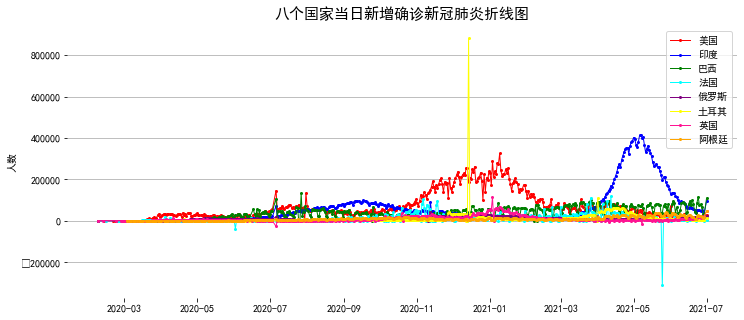

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 自定义函数，接收国家和颜色两个参数，每次调用绘制一个国家的折线图
def line_chart(name,color1):
    x = alltime_world.loc[alltime_world.名称==name,'日期']
    y_total = alltime_world.loc[alltime_world.名称==name,'当日新增确诊']
    ax.plot(x,y_total,color=color1,lw=1,marker='o',ms=2,label=name)

# 创建画布，切分绘图区域，绘制两条曲线
figure = plt.figure(figsize=(12,5))
ax = plt.subplot()

# 设置绘图区字体
mpl.rcParams['font.family'] = 'simhei' 
mpl.rcParams['font.size'] = 10 

# 数据准备
country_name = alltime_world.groupby(by='名称')['累计确诊'].max().sort_values(ascending=False)[:8].index 
color1 = ['red','blue','green','cyan','purple','yellow','deeppink','orange'] 

# 遍历八个国家，调用自定义函数绘图
for i in range(len(country_name)):
    line_chart(country_name[i],color1[i])

# 设置图外观（图标题，y轴标题，图例等）
plt.title('八个国家当日新增确诊新冠肺炎折线图',size=15)
plt.ylabel('人数')
plt.legend(bbox_to_anchor=[1,1])  
plt.grid(axis='y')   
plt.box(False)


plt.show()

#### 结论：各国新增确诊人数波动较大，但总体趋势呈下降状态。在六月初，印度的单日新增确诊人数超过40000例。其次是美国、巴西。

### 5.2.3中国新冠肺炎的累计确诊和当日新增确诊绘制

#### 目的：查看中国新冠肺炎的累计确诊和当日新增确诊绘制，并可视化展示


#### 步骤
#### step1：取出中国的数据
#### step2：设置绘图参数
#### step3：绘图。累计确诊通过折线图展示，当日新增确诊通过柱形图展示

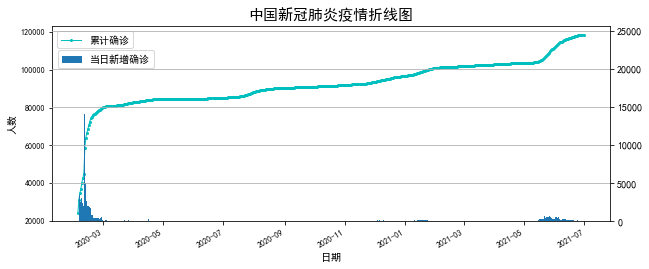

In [11]:
# 数据准备
China = alltime_world[alltime_world['名称']=='中国']
China.set_index('日期',inplace=True)# 设置日期为索引

# 创建画布
fig, ax = plt.subplots(figsize=(10, 4))

# 设置绘图区字体
mpl.rcParams['font.family'] = 'simhei' # 设置显示字体
mpl.rcParams['font.size'] = 10 # 设置显示字体大小

# 画图
China['累计确诊'].plot(ax=ax, fontsize=8,style='-',lw=1,color='c',marker='o',ms=2,legend=True)   # 累计确诊折线图
ax1 = ax.twinx()
ax1.bar(China.index, China['当日新增确诊'])   # 当日新增确诊柱形图

# 设置图外观（图标题，y轴标题，图例等）
plt.title('中国新冠肺炎疫情折线图',size=15)
ax.set_ylabel('人数', fontsize=10)
ax.set_xlabel('日期', fontsize=10)
ax1.legend(['当日新增确诊'],loc='upper left',bbox_to_anchor=(0.001, 0.9))   # 设置图例
plt.grid(axis='y')
plt.box(False)

plt.show()

#### 结论：在疫情爆发初期，中国疫情的累计确诊呈直线增长，当日新增的确诊人数最高突破7000人。但在政府强有力的防疫工作后，累计确诊趋于平稳，当日新增人数更是保持0的佳绩。

## 5.3数据分析可视化2-pyecharts绘图

### 5.3.1世界各国家现存确诊人数地图

#### 目的：将国家或地区的数值信息映射到地图上，通过颜色变化来表示数值的大小或范围。颜色地图适合带有地理位置信息的数据的展现，将颜色和地图相结合，直观显示数据的地理分布，通过颜色深浅容易判断数值的大小。

In [12]:
import pandas as pd
world_data = pd.read_csv('alltime_world_2021_07_01.csv', encoding='utf-8')

In [13]:
# 缺失值处理

world_data.interpolate(method='linear', inplace=True)

world_data.fillna(0, inplace=True)

world_data['today_storeConfirm'] = world_data['total_confirm']-world_data['total_heal']-world_data['total_dead']


world_data['date'] = pd.to_datetime(world_data['date'])

world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73597 entries, 0 to 73596
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                73597 non-null  datetime64[ns]
 1   total_confirm       73597 non-null  int64         
 2   total_suspect       73597 non-null  int64         
 3   total_heal          73597 non-null  int64         
 4   total_dead          73597 non-null  int64         
 5   total_severe        73597 non-null  int64         
 6   total_input         73597 non-null  int64         
 7   today_confirm       73597 non-null  int64         
 8   today_suspect       73597 non-null  float64       
 9   today_heal          73597 non-null  int64         
 10  today_dead          73597 non-null  int64         
 11  today_severe        73597 non-null  float64       
 12  today_storeConfirm  73597 non-null  int64         
 13  today_input         73597 non-null  float64   

In [14]:
world_data

,date,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,today_input,name
0,2020-03-03,1,0,0,0,0,0,1,0.0,0,0,0.0,1,0.0,突尼斯
1,2020-03-08,2,0,0,0,0,0,1,0.0,0,0,0.0,2,0.0,突尼斯
2,2020-03-09,5,0,0,0,0,0,3,0.0,0,0,0.0,5,0.0,突尼斯
3,2020-03-11,7,0,0,0,0,0,2,0.0,0,0,0.0,7,0.0,突尼斯
4,2020-03-12,13,0,0,0,0,0,6,0.0,0,0,0.0,13,0.0,突尼斯
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73592,2021-06-26,42194,0,40569,906,0,0,0,0.0,0,0,0.0,719,0.0,马达加斯加
73593,2021-06-27,42194,0,40569,906,0,0,0,0.0,0,0,0.0,719,0.0,马达加斯加
73594,2021-06-28,42194,0,40579,909,0,0,0,0.0,10,3,0.0,706,0.0,马达加斯加
73595,2021-06-29,42194,0,40579,909,0,0,0,0.0,0,0,0.0,706,0.0,马达加斯加


In [15]:
# 选取最新更新的各国数据
world_data_groupby = world_data[['name','date','total_confirm']].groupby(by=['name'], as_index=False).max()

world_data_merge = pd.merge(world_data_groupby, world_data, on=['name','date','total_confirm'], how='left')
world_data_merge

,name,date,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,today_input
0,不丹,2020-06-14,66,0.0,21.0,0.0,0.0,0.0,4.0,0.000000,1.0,0.0,0.000000,45.0,0.0
1,东帝汶,2020-06-11,24,0.0,24.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,中国,2021-07-01,118622,0.0,108685.0,5508.0,0.0,6600.0,128.0,0.000000,264.0,19.0,0.000000,4429.0,21.0
3,中非共和国,2021-07-01,7141,0.0,6859.0,98.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,184.0,0.0
4,丹麦,2021-07-01,294503,0.0,289000.0,2535.0,0.0,0.0,344.0,0.000000,319.0,0.0,0.000000,2968.0,0.0
5,乌克兰,2021-07-01,2300806,0.0,2226497.0,54632.0,0.0,0.0,1747.0,0.000000,4268.0,101.0,0.000000,19677.0,0.0
6,乌兹别克斯坦,2021-07-01,111153,0.0,107696.0,740.0,0.0,0.0,963.0,0.000000,1280.0,7.0,0.000000,2717.0,0.0
7,乌干达,2021-07-01,79977,0.0,52961.0,1023.0,0.0,0.0,888.0,0.000000,1101.0,67.0,0.000000,25993.0,0.0
8,乌拉圭,2021-07-01,369350,0.0,348489.0,5593.0,0.0,0.0,2435.0,0.000000,3686.0,69.0,0.000000,15268.0,0.0
9,乍得,2021-07-01,4951,0.0,4769.0,174.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,8.0,0.0


In [16]:

import pyecharts
import pyecharts.options as opts   # 调整配置项
from pyecharts.charts import Map   # Map类用于绘制地图



#### 利用Map类绘制世界地图，需要输入各国家的英文名称和对应的数值，但我们的数据中国家的名称是中文，所以我们首先要将中文名称转换为英文名称。

#### 我们载入国家中英文对照表，使用Series类的replace方法将各国家对应的中文名称替换成英文名称：

In [17]:
contry_name = pd.read_csv('county_china_english.csv', encoding='gbk')
contry_name.head()

,英文,中文
0,Afghanistan,阿富汗
1,Aland Islands,奥兰群岛
2,Albania,阿尔巴尼亚
3,Algeria,阿尔及利亚
4,American Samoa,美属萨摩亚


In [18]:
world_data_merge['eg_name'] = world_data_merge['name'].replace(contry_name['中文'].values ,contry_name['英文'].values)
world_data_merge['eg_name'].head()

0                  Bhutan
1             Timor-Leste
2                   China
3    Central African Rep.
4                 Denmark
Name: eg_name, dtype: object

In [19]:
world_data_merge

,name,date,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,today_input,eg_name
0,不丹,2020-06-14,66,0.0,21.0,0.0,0.0,0.0,4.0,0.000000,1.0,0.0,0.000000,45.0,0.0,Bhutan
1,东帝汶,2020-06-11,24,0.0,24.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,Timor-Leste
2,中国,2021-07-01,118622,0.0,108685.0,5508.0,0.0,6600.0,128.0,0.000000,264.0,19.0,0.000000,4429.0,21.0,China
3,中非共和国,2021-07-01,7141,0.0,6859.0,98.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,184.0,0.0,Central African Rep.
4,丹麦,2021-07-01,294503,0.0,289000.0,2535.0,0.0,0.0,344.0,0.000000,319.0,0.0,0.000000,2968.0,0.0,Denmark
5,乌克兰,2021-07-01,2300806,0.0,2226497.0,54632.0,0.0,0.0,1747.0,0.000000,4268.0,101.0,0.000000,19677.0,0.0,Ukraine
6,乌兹别克斯坦,2021-07-01,111153,0.0,107696.0,740.0,0.0,0.0,963.0,0.000000,1280.0,7.0,0.000000,2717.0,0.0,Uzbekistan
7,乌干达,2021-07-01,79977,0.0,52961.0,1023.0,0.0,0.0,888.0,0.000000,1101.0,67.0,0.000000,25993.0,0.0,Uganda
8,乌拉圭,2021-07-01,369350,0.0,348489.0,5593.0,0.0,0.0,2435.0,0.000000,3686.0,69.0,0.000000,15268.0,0.0,Uruguay
9,乍得,2021-07-01,4951,0.0,4769.0,174.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,8.0,0.0,Chad


#### 将我们需要的数据提取出来，保存成一个嵌套列表的形式：

In [20]:
heatmap_data = world_data_merge[['eg_name','today_storeConfirm']].values.tolist()
heatmap_data[:10]

[['Bhutan', 45.0],
 ['Timor-Leste', 0.0],
 ['China', 4429.0],
 ['Central African Rep.', 184.0],
 ['Denmark', 2968.0],
 ['Ukraine', 19677.0],
 ['Uzbekistan', 2717.0],
 ['Uganda', 25993.0],
 ['Uruguay', 15268.0],
 ['Chad', 8.0]]

#### 接下来开始绘图，首先初始化类对象Map，并调用add方法添加绘图基本配置：

In [21]:
map_ = Map().add(series_name = "现存确诊人数", # 设置提示框标签
                 data_pair = heatmap_data, # 输入数据
                 maptype = "world", # 设置地图类型为世界地图
                 is_map_symbol_show = False # 不显示标记点
                ) 

In [22]:
# 设置系列配置项
map_.set_series_opts(label_opts=opts.LabelOpts(is_show=False))  # 不显示国家（标签）名称

In [23]:
# 设置全局配置项
map_.set_global_opts(title_opts = opts.TitleOpts(title="世界各国家现存确诊人数地图"), # 设置图标题
                     # 设置视觉映射配置项
                     visualmap_opts = opts.VisualMapOpts(pieces=[ # 自定义分组的分点和颜色
                                                               {"min": 10000,"color":"#800000"}, # 栗色
                                                               {"min": 5000, "max": 9999, "color":"#B22222"}, # 耐火砖
                                                               {"min": 999, "max": 4999,"color":"#CD5C5C"}, # 印度红
                                                               {"min": 100, "max": 999, "color":"#BC8F8F"}, # 玫瑰棕色
                                                               {"max": 99, "color":"#FFE4E1"}, # 薄雾玫瑰
                                                              ], 
                     is_piecewise = True))  # 显示分段式图例

#### 调用render_notebook方法，在jupyter notebook中渲染图形

In [25]:
map_.render_notebook()

#### 结论：由上图可以看到，新冠肺炎疫情已经造成了全球大流行，世界上只有几个国家还没有受到新冠肺炎疫情的侵袭。在亚洲，伊朗现存确诊人数最多，中国由于发生疫情较早，防控措施到位以及对患者积极的治疗，现存确诊人数已大幅减少。在美洲，美国目前是世界上疫情最为严重的国家，现存确诊人数最多，这个数字还在随着每日新增确诊人数的增加而不断上升。欧洲是目前世界上疫情最为严重的大洲，以意大利和西班牙为首的几个主要国家都有大量的现存确诊病例，各个国家的医疗系统正面临巨大的压力。

### 5.3.2 世界国家累计确诊人数动态条形图

#### 研究方法：动态条形图
#### 研究对象：疫情最为严重的10个国家
#### 研究目的：通过条形图看出不同国家确诊人数的差距

#### 步骤

#### 1.挑选出疫情最为严重的10个国家，并筛选出这些国家的历史疫情数据

In [26]:
country_list = world_data.groupby(by='name')['total_confirm'].max().sort_values(ascending=False)[:10].index # 累计确诊人数最多的10个国家
need_data = world_data[world_data['name'].isin(country_list)]

#### 2.接下来使用datetime模块生成时间数据，构造时间列表

In [27]:
from datetime import datetime,timedelta
time_list = [(datetime(2021, 6, 1) + timedelta(i)).strftime('%Y-%m-%d') for i in range(29)]

#### 3.载入Matplotlib库，并设置正常显示中文字体

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.dpi'] = 100

#### 4.为每个国家设置一种颜色

In [29]:
color_list = ['brown','peru','orange','blue','green','red','yellow','teal','pink','orchid']
country_color = pd.DataFrame()
country_color['country'] = country_list
country_color['color'] = color_list

#### 5.定义绘图函数

In [30]:
import matplotlib.ticker as ticker

def barh_draw(day):
    
    # 提取每一天的数据
    draw_data = need_data[need_data['date']==day][['name','total_confirm']].sort_values(by='total_confirm',ascending=True)
    
    # 清空当前的绘图
    ax.clear()
    
    # 绘制条形图
    ax.barh(draw_data['name'],draw_data['total_confirm'], color=[country_color[country_color['country']==i]['color'].values[0] for i in draw_data['name']])
    
    # 数值标签的间距
    dx = draw_data['total_confirm'].max()/200
    
    # 添加数值标签
    for j, (name, value) in enumerate(zip(draw_data['name'], draw_data['total_confirm'])):
        
        ax.text(value+dx, j, f'{value:,.0f}', size=10, ha='left', va='center')
        
    ax.text(draw_data['total_confirm'].max()*0.75, 0.4, day, color='#777777',size=40, ha='left')
    
    # 设置刻度标签的格式
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    # 设置刻度的位置
    ax.xaxis.set_ticks_position('top')

    # 设置刻度标签的颜色和大小
    ax.tick_params(axis='x',colors='#777777', labelsize=15)
    
    # 添加网格线
    ax.grid(which='major',axis='x',linestyle='-')
    
    # 添加图标题
    ax.text(0, 11, '6月世界各国家累计确诊人数动态条形图',size=20, ha='left')
    
    # 去除图边框
    plt.box(False)
    
    plt.close()

#### 6.绘图

In [31]:
# 动态绘图
fig, ax = plt.subplots(figsize=(12, 6))

import matplotlib.animation as animation
from IPython.display import HTML

animator = animation.FuncAnimation(fig, barh_draw, frames=time_list, interval=200)
HTML(animator.to_jshtml())

#### 结论：从动态条形图中可以看到，6月美国的累计确诊人数排在一直位居第一，其它几个国家的累计确诊人数也在以较快的速度增长，例如印度，巴西等国家。

# 6. 模型建立与评估



### SIR模型原理
SIR模型是在1927年由两位传染病学家A.G.McKendric和W.O.Kenmack提出的。SIR模型是最经典的传染病模型之一，主要用来预测疫情发生后不同时刻的未感染人数、感染人数和康复人数。

在疫情发生时，随着感染者在一定区域范围内的移动，与未感染者接触，就会将未感染者感染为感染者。同时，感染者也会不断康复，最终变为康复者。康复者因为身体内有了抗体以后就不会再被感染了。SIR模型就是基于对上述过程的一个数学描述。SIR模型将人群分为三类，分别是：易感者（Susceptible）、感染者（Infectious）和恢复者（Recovered）。三者关系：易感者→感染者→恢复者。

在SIR模型中，我们不考虑出生率与死亡率。所以SIR模型中三类人群的总数也是不会发生改变的。

**符号说明：**

变量	含义

t	第t天

S(t)	第t天的易感者人数

I(t)	第t天的感染者人数

R(t)	第t天的恢复者人数


我们用I/N表示易感者与感染者接触的概率，β表示易感者与感染者接触后被感染的概率，γ表示感染者恢复的速率。

所以每天新增的由易感者转化为感染者的人数就等于：-S T/N β。因为易感者的人数在不断减少，所以我们需要在式子前边添加负号。

每天新增的由感染者转化为恢复者的人数等于：γI。因为在疫情期间恢复者的人数是在不断增加的，所以在式子前边不用添加负号。

这样，我们就得到了微分方程组：
到了微分方程组：

![avatar](math.png)


## 探究拟合参数β、γ对美国疫情的影响
这里我们用美国的疫情数据举例，运用SIR模型进行模拟。

**模型假设**：易感者被感染后就会直接发病，中间不会有潜伏期；患者康复后不再受感染。

需要输入 odeint()函数的参数：微分方程、初始值、t以及微分方程的相关参数。

首先定义SIR微分方程：

In [32]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

定义SIR相关方程

In [33]:
def SIR(y,t,beta,gamma):   
    S,I,R = y
    dSdt = -S*(I/(S+I+R))*beta
    dIdt = beta*S*I/(S+I+R)-gamma*I
    dRdt = gamma*I
    return [dSdt,dIdt,dRdt]

In [34]:
# 数据准备
world_data = pd.read_csv('alltime_world_2021_07_01.csv', encoding='utf-8')   # 读取所有国家的疫情数据

world_data.interpolate(method='linear', inplace=True) # 先使用线性插值的方式填充缺失值

world_data.fillna(0, inplace=True) # 再使用0填充缺失值

world_data['today_storeConfirm'] = world_data['total_confirm']-world_data['total_heal']-world_data['total_dead'] # 计算当日现存确诊人数

world_data['date'] = pd.to_datetime(world_data['date']) # 将日期改成datetime格式

American = world_data[world_data['name']=='美国'] # 挑选出其中关于美国至今的疫情数据
American

,date,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,today_input,name
4420,2020-02-08,14,0,0,0,0,0,14,0.0,0,0,0.0,14,0.0,美国
4421,2020-02-13,15,0,0,0,0,0,1,0.0,0,0,0.0,15,0.0,美国
4422,2020-02-21,34,0,0,0,0,0,19,0.0,0,0,0.0,34,0.0,美国
4423,2020-02-22,53,0,0,0,0,0,19,0.0,0,0,0.0,53,0.0,美国
4424,2020-02-24,53,0,0,0,0,0,0,0.0,0,0,0.0,53,0.0,美国
4425,2020-02-25,57,0,0,0,0,0,4,0.0,0,0,0.0,57,0.0,美国
4426,2020-02-26,60,0,0,0,0,0,3,0.0,0,0,0.0,60,0.0,美国
4427,2020-02-27,60,0,0,0,0,0,0,0.0,0,0,0.0,60,0.0,美国
4428,2020-02-28,63,0,1,0,0,0,3,0.0,1,0,0.0,62,0.0,美国
4429,2020-02-29,63,0,1,1,0,0,0,0.0,0,1,0.0,61,0.0,美国


In [35]:
# 设置总人口N = 328000000
N = 328000000
# 易感者（Susceptible）、感染者（Infectious）和恢复者（Recovered）
infectious_real = American['today_storeConfirm']      # 感染者（Infectious） = 当日现存确诊（today_storeConfirm）
recovered_real = American['total_heal'] + American['total_dead']    # 恢复者（Recovered） = 累计治愈（total_heal) + 累计死亡(total_dead)
susceptible_real = N - American['total_heal'] + American['total_dead']  # 易感者（Susceptible） = 人群总数（N）-累计治愈+累计死亡

使用美国的疫情数据，查看当没有外界干预的条件下，即理想条件下，不同的β值和γ值会对疫情造成什么样的变化。

我们设立4组不同的值和值进行预测，并对结果进行比较：（β，γ）：[(0.125, 0.05),(0.25, 0.05),(0.25, 0.1),(0.8, 0.1)]
（β越大，新冠病毒的传染性越强；γ越大，治愈速率越快，恢复所需时间越短。）  

在这四组预测中，第一组与我们之前做的预测是相同的。  
第二组将β的值扩大了一倍，而γ值不变，也就是说在第二组估计中，我们设置新冠病毒的传染性变得更强了，但是治愈速率没有改变，也就是说一个患者还是需要花同样长的时间才能康复。  
在第三组中，我们设置新冠病毒的传染性变得更强的同时，治愈速率也提高了一倍，患者只需要原来一半的时间就可以康复。   
在第四组中，我们没有对新冠病毒的传染性作出调整，并且设置患者只需要原来一半的情形就可以康复。


查看在这四种情形下，疫情的形势都将发生怎样的变化（以3月1日为初始值，查看美国360天的疫情形势变化）：

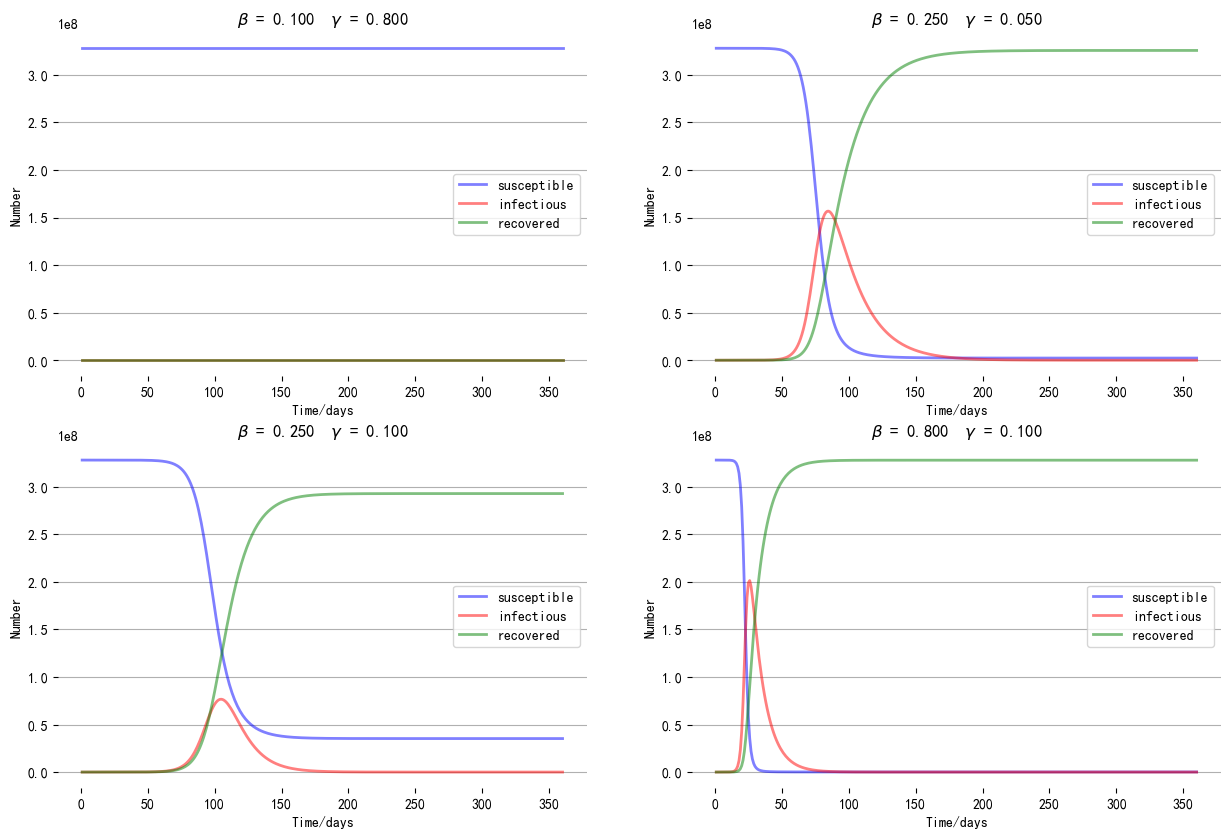

In [36]:
# 设置初始值  3月1日至未来360天
N = 328000000   # 设置人群总人数为N
I0 = American.set_index('date').loc['2020-03-01']['today_storeConfirm']      # 设置初始时的感染人数I0(today_storeConfirm)
R0 = American.set_index('date').loc['2020-03-01']['today_dead']+American.set_index('date').loc['2020-03-01']['today_heal']  # 设置初始时的恢复人数R0(today_heal+total_dead)
S0 = N - I0 - R0   # 初始易感者人群人数 = 总人数 - 初始感染人数 - 初始治愈人数
y0 = [S0, I0, R0]   # 设置初始值
t = np.linspace(1,360,360)   # 设置天数
# 设置beta和gamma参数
param_list = [(0.1, 0.8),
             (0.25, 0.05),
             (0.25, 0.1),
             (0.8, 0.1)]
# 预测
solution_list = [odeint(SIR, y0, t, args=item) for item in param_list]
# 绘图
fig = plt.figure(facecolor='w',figsize=(15,10), dpi=100)

for plot_index, solution, params in zip(range(5)[1:], solution_list, param_list):
    
    ax = fig.add_subplot(int('22'+str(plot_index)))
    ax.set_title(r'$\beta$ = %.3f  $\gamma$ = %.3f' % params)
    
    for index, color, label_name in zip(range(3), 
                                        ['b','r','g'],
                                        ['susceptible','infectious','recovered']):
        ax.plot(t, solution[:, index], color, alpha=0.5, lw=2, label=label_name)
    
    ax.set_xlabel('Time/days')
    ax.set_ylabel('Number')
    ax.legend()
    ax.grid(axis='y')
    plt.box(False)

在这四幅图中，很明显可以看出随着β和γ的改变，峰值所产生的影响及峰值到来的时间均发生了一定的改变。  

可以看出β与γ的比值在这一预测中起主导作用，二者比值越大，则疫情峰值来的越快，故我们可以采用以美国过去的数据集对当前SIR模型中β和γ的值进行训练后得到最能反映美国真实疫情的β和γ。但由于对机器学习模型的建立理解程度不够全面，故模型建立部分到这里就结束，  



### 总结
本次模型建立过程中通过研究传染病SIR模型，了解到了该模型的预测方式，及所有具体参数的相关性，该模型在理想条件下应该可以达到较为优秀的效果，

# 7. 总结


 &ensp;&ensp; <font size=3>本次数据分析作业，考虑到当前背景，我们小组的最终选题为“新冠疫情大数据分析”，在小组获取数据，分析数据，数据清洗，绘图建模部分，小组间均进行了激烈的讨论，就不同的问题采取了不同的方法进行处理，并对于报告的撰写也在不断修改，力求能展现出我们小组本学期的数据分析所学的知识，将知识真正运用到实践当中来，下面分别对数据爬取，数据分析，及模型建立三个模块进行总结。  
&ensp;&ensp;一.数据爬取部分，在这一部分我们小组成员均了解了各种爬虫库的基本用法，更多的了解了网页的构成及我对于网站接口的利用，可以说没有这一方面的信息收集，就没有接下来的数据分析和模型建立部分。在数据爬取部分我们依然遇到了许多编码上或者是技术上的困难，在刚开始时，小组对于json数据的基本处理都不太了解，但随着一步一步的修改与学习，大家都掌握了这一技术，学会了如何从一个网站中爬出我们想要的数据及生成对应的csv文件。  
&ensp;&ensp;二：数据分析部分:通过本次数据分析，我们学会了将平时上课老师所讲的知识转化为实际的应用能力，真正做到了学以致用。当拿到数据集时，首先要对数据预处理，可以先输出几个特殊的数据观察，对数据中缺少值的位置进行填充，防止漠视这些数据导致挖掘出错误的结论。其次，挑选最具代表性的数据（疫情严重的前几个国家），数据可视化观察。这次大作业中，我们组使用Map类的render_notebook方法绘制世界地图，通过颜色的深浅表示患者的人数，让我们更易于观察到世界上不同地方疫情的情况。在编码过程中，我们遇到学到问题，比如参数的设置，库的使用。但随着学习这些困难都迎刃而解。  
 &ensp;&ensp;三.模型建立部分，在这一部分中，我们小组搜索了几个常用的传染病模型后，选择了相对理想化的SIR模型，并简单学习了在这一模型中各个参数的具体使用，以及影响模型的关键因素，虽然最后我们没有成功使用机器学习建立出相关模型，但这也将为我们未来的学习打下一定的基础。  
 &ensp;&ensp;感谢老师在数据分析课上的教导，虽然我们所学可能没达到老师要求的程度，仍然有着许多不足和缺点，但这正是以后学习需要弥补的。所以我们还会继续努力，一路向前！  
 &ensp;&ensp;最后，谢谢老师，老师辛苦了！